In [1]:
#Programmer : Muhammad Khairul Rijal Bin Muhammad
#Matric No.: MAN 161021

In [2]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt # graphics package
import seaborn as sns
from IPython.display import display, HTML

In [3]:
#Load Data From CSV
telco = pd.read_csv('C://Users/mkrijal/Desktop/ML_Assignment/Telco-Customer-Churn.csv')
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Dataset rows and columns
telco.shape

(7043, 21)

In [8]:
#Attributes type
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Check missing value/null
tab_info=pd.DataFrame(telco.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(telco.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(telco.isnull().sum()/telco.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
column type,object,object,int64,object,object,int64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Check duplicate instances
telco.duplicated().sum()

0

In [11]:
#Show the summarize dataset
telco.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [13]:
#Show churn class
telco['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
#Count no of customer churn and not
pd.value_counts(telco["Churn"])

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
#Correlation Function
'''method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
'''
correlation = telco.corr(method='pearson')
print(correlation)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


In [16]:
#Correlation Function
'''method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
'''
correlation = telco.corr(method='kendall')
print(correlation)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.015315        0.180636
tenure               0.015315  1.000000        0.190565
MonthlyCharges       0.180636  0.190565        1.000000


In [17]:
#Correlation Function
'''method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
'''
correlation = telco.corr(method='spearman')
print(correlation)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.018556        0.221067
tenure               0.018556  1.000000        0.276417
MonthlyCharges       0.221067  0.276417        1.000000


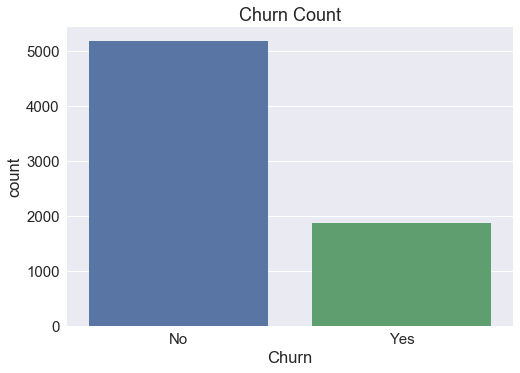

In [19]:
#Data Visualization
sns.set(font_scale=1.5)
sns.countplot(x="Churn", data=telco)
telco.loc[:,'Churn'].value_counts()
plt.title('Churn Count')
plt.savefig("Figure 1_Bar Graph.png") #save figure

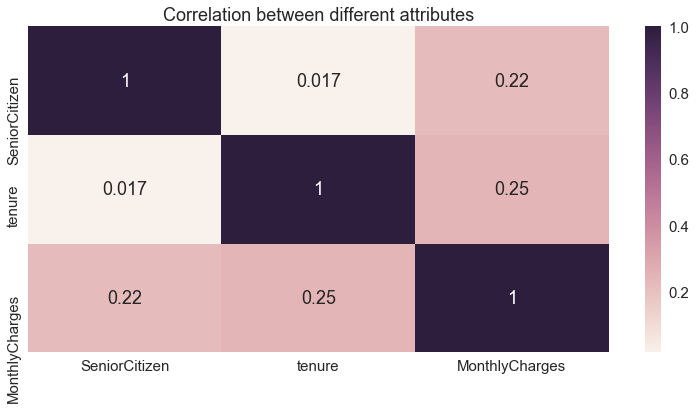

In [20]:
plt.figure(figsize=(13,6))
sns.heatmap(telco.corr(method='pearson'),annot=True)
plt.title('Correlation between different attributes')
plt.savefig("Figure 2_Correlation Attribute.png") #save figure

In [21]:
#Show gender class
telco['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
#Count no of male and female customer
pd.value_counts(telco["gender"])

Male      3555
Female    3488
Name: gender, dtype: int64

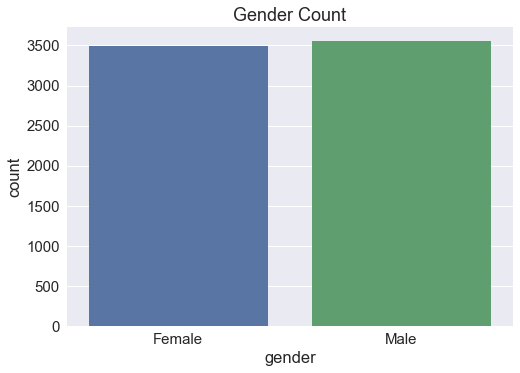

In [23]:
#Data Visualization
sns.set(font_scale=1.5)
sns.countplot(x="gender", data=telco)
telco.loc[:,'gender'].value_counts()
plt.title('Gender Count')
plt.savefig("Figure 1_Bar Graph.png") #save figure